In [1]:
import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,DATX,MDTX,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1960-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.00,NaN,77.0,83.0,67.0
1960-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.00,NaN,74.0,83.0,70.0
1960-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.02,NaN,72.0,79.0,69.0
1960-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.47,NaN,67.0,71.0,63.0
1960-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.55,NaN,66.0,75.0,61.0
...,...,...,...,...,...,...,...,...,...
2024-04-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.09,NaN,64.0,73.0,NaN
2024-04-19,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.09,NaN,65.0,69.0,55.0
2024-04-20,ASN00066037,"SYDNEY AIRPORT AMO, AS",NaN,NaN,0.27,NaN,65.0,67.0,59.0


In [45]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

station                0.0
name                   0.0
prcp                   0.0
tmax                   0.0
tmin                   0.0
target                 0.0
rolling_3_tmax         0.0
rolling_3_tmax_pct     0.0
rolling_3_tmin         0.0
rolling_3_tmin_pct     0.0
rolling_3_prcp         0.0
rolling_3_prcp_pct     0.0
rolling_14_tmax        0.0
rolling_14_tmax_pct    0.0
rolling_14_tmin        0.0
rolling_14_tmin_pct    0.0
rolling_14_prcp        0.0
rolling_14_prcp_pct    0.0
month_avg_tmax         0.0
day_avg_tmax           0.0
month_avg_tmin         0.0
day_avg_tmin           0.0
month_avg_prcp         0.0
day_avg_prcp           0.0
dtype: float64

In [4]:
valid_columns = weather.columns[null_pct < .05]

In [5]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [6]:
weather = weather[valid_columns].copy()

In [7]:
weather.columns = weather.columns.str.lower()

In [8]:
weather

,station,name,prcp,tmax,tmin
DATE,,,,,
1960-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,67.0
1960-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,70.0
1960-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.02,79.0,69.0
1960-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.47,71.0,63.0
1960-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.55,75.0,61.0
...,...,...,...,...,...
2024-04-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,73.0,NaN
2024-04-19,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,69.0,55.0
2024-04-20,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.27,67.0,59.0


In [9]:
weather = weather.ffill()

In [10]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [11]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [12]:
weather.dtypes

station     object
name        object
prcp       float64
tmax       float64
tmin       float64
dtype: object

In [13]:
weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
       '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22'],
      dtype='object', name='DATE', length=23485)

In [14]:
weather.index = pd.to_datetime(weather.index)

In [15]:
weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    366
2021    365
2022    365
2023    365
2024    109
Name: DATE, Length: 65, dtype: int64

In [17]:
weather["target"] = weather.shift(-1)["tmax"]

In [18]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1960-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,67.0,83.0
1960-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,70.0,79.0
1960-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.02,79.0,69.0,71.0
1960-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.47,71.0,63.0,75.0
1960-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.55,75.0,61.0,75.0
...,...,...,...,...,...,...
2024-04-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,73.0,62.0,69.0
2024-04-19,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,69.0,55.0,67.0
2024-04-20,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.27,67.0,59.0,69.0


In [19]:
weather = weather.ffill()

In [20]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1960-01-01,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,67.0,83.0
1960-01-02,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,83.0,70.0,79.0
1960-01-03,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.02,79.0,69.0,71.0
1960-01-04,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.47,71.0,63.0,75.0
1960-01-05,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.55,75.0,61.0,75.0
...,...,...,...,...,...,...
2024-04-18,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,73.0,62.0,69.0
2024-04-19,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.09,69.0,55.0,67.0
2024-04-20,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.27,67.0,59.0,69.0


In [21]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [22]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [23]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [24]:
predictions = backtest(weather, rr, predictors)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

4.572130026731472

In [26]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2013-01-17,116.0,82.937530,33.062470
1980-11-26,104.0,73.512048,30.487952
1983-01-07,108.0,78.024004,29.975996
1994-12-20,110.0,82.073261,27.926739
1981-12-04,105.0,77.073522,27.926478
...,...,...,...
2016-09-06,71.0,71.002606,0.002606
1975-02-17,76.0,76.002147,0.002147
2021-05-30,65.0,64.997922,0.002078


In [27]:
pd.Series(rr.coef_, index=predictors)

prcp   -0.580038
tmax    0.463635
tmin    0.317971
dtype: float64

In [28]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [29]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [30]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [31]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [32]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.300833944307142

In [33]:
mean_squared_error(predictions["actual"], predictions["prediction"])

33.334671383730964

In [34]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2013-01-17,116.0,83.261744,32.738256
1994-12-20,110.0,80.202173,29.797827
2009-11-21,108.0,78.936104,29.063896
1982-11-24,110.0,80.969011,29.030989
1983-01-07,108.0,79.658313,28.341687
...,...,...,...
2002-04-07,74.0,74.001558,0.001558
2016-08-24,63.0,62.998597,0.001403
2002-03-13,74.0,74.001074,0.001074


In [35]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.34,70.0,60.0,72.0,78.000000,-0.102564,67.666667,-0.113300,...,68.857143,-0.128631,0.110714,2.070968,77.556030,77.387097,62.892209,63.322581,0.184664,0.200323
1990-03-08,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.33,72.0,60.0,85.0,73.333333,-0.018182,64.333333,-0.067358,...,67.928571,-0.116719,0.129286,1.552486,77.550107,78.032258,62.889126,63.903226,0.184819,0.246452
1990-03-09,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,85.0,55.0,81.0,75.666667,0.123348,58.333333,-0.057143,...,66.714286,-0.175589,0.129286,-1.000000,77.558040,80.161290,62.880724,63.161290,0.184622,0.191935
1990-03-10,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,81.0,61.0,79.0,79.333333,0.021008,58.666667,0.039773,...,65.928571,-0.074756,0.117143,-1.000000,77.561702,76.193548,62.878723,63.161290,0.184426,0.106452
1990-03-11,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,79.0,67.0,69.0,81.666667,-0.032653,61.000000,0.098361,...,65.714286,0.019565,0.097857,-1.000000,77.563231,76.548387,62.883103,61.741935,0.184230,0.436129
1990-03-12,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.02,69.0,63.0,75.0,76.333333,-0.096070,63.666667,-0.010471,...,65.142857,-0.032895,0.098571,-0.797101,77.554140,78.516129,62.883227,62.225806,0.184055,0.267419
1990-03-13,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.08,75.0,60.0,76.0,74.333333,0.008969,63.333333,-0.052632,...,64.714286,-0.072848,0.100714,-0.205674,77.551432,78.064516,62.880170,63.258065,0.183945,0.122903
1990-03-14,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.12,76.0,60.0,81.0,73.333333,0.036364,61.000000,-0.016393,...,64.357143,-0.067703,0.109286,0.098039,77.549788,76.774194,62.877119,62.903226,0.183877,0.054839
1990-03-15,ASN00066037,"SYDNEY AIRPORT AMO, AS",0.00,81.0,60.0,71.0,77.333333,0.047414,60.000000,0.000000,...,63.785714,-0.059351,0.109286,-1.000000,77.553439,78.645161,62.874074,62.483871,0.183683,0.101290


<Axes: >

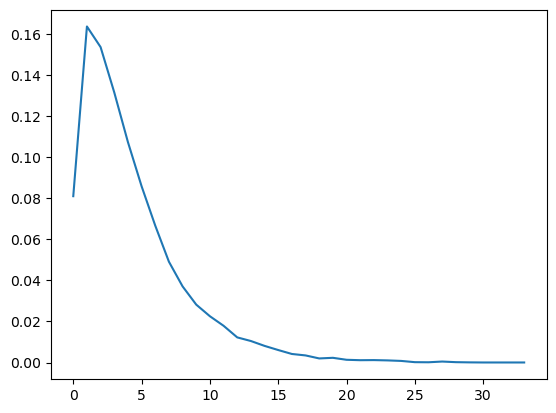

In [36]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [38]:
predictions.tail()

,actual,prediction,diff
DATE,,,
2024-04-18,69.0,73.791462,4.791462
2024-04-19,67.0,71.737082,4.737082
2024-04-20,69.0,70.414115,1.414115
2024-04-21,73.0,72.427694,0.572306
2024-04-22,73.0,74.155871,1.155871


In [42]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your dataset
data = {
    'DATE': ['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
             '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22'],
    'actual': [83.0, 83.0, 79.0, 71.0, 75.0, 69.0, 67.0, 69.0, 73.0, 73.0],
    'prcp': [0.00, 0.00, 0.02, 0.47, 0.55, 0.09, 0.09, 0.27, 0.00, None],
    'tmax': [83.0, 83.0, 79.0, 71.0, 75.0, 73.0, 69.0, 67.0, 69.0, 73.0],
    'tmin': [67.0, 70.0, 69.0, 63.0, 61.0, None, 55.0, 59.0, None, 57.0]
}

df = pd.DataFrame(data)

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Split the data into features (X) and target variable (y)
X = df[['prcp', 'tmax', 'tmin']]
y = df['actual']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
reg = Ridge(alpha=0.1)
reg.fit(X_train, y_train)

# Make predictions
next_day_data = [[0.0, 73.0, 57.0]]  # Assuming prcp=0.0, tmax=73.0, tmin=57.0 for the next day
next_day_prediction = reg.predict(next_day_data)
print("Prediction for the next day:", next_day_prediction[0])


Prediction for the next day: 71.74259500235804


In [44]:
import pandas as pd

data = {
    'DATE': ['2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21', '2024-04-22'],
    'actual': [69.0, 67.0, 69.0, 73.0, 73.0],
    'prediction': [73.791462, 71.737082, 70.414115, 72.427694, 74.155871],
    'diff': [4.791462, 4.737082, 1.414115, 0.572306, 1.155871]
}

df = pd.DataFrame(data)

# Add prediction for April 23, 2024
next_day_prediction =  71.74259500235804
next_day_diff = next_day_prediction - df['actual'].iloc[-1]
df.loc[len(df)] = ['2024-04-23', 75, next_day_prediction, next_day_diff]

print(df)


         DATE  actual  prediction      diff
0  2024-04-18    69.0   73.791462  4.791462
1  2024-04-19    67.0   71.737082  4.737082
2  2024-04-20    69.0   70.414115  1.414115
3  2024-04-21    73.0   72.427694  0.572306
4  2024-04-22    73.0   74.155871  1.155871
5  2024-04-23    75.0   71.742595 -1.257405
